# I Logistic regression

Classification problem where the variable <code>**y**</code> that we want to predict is <code>**discrete value**</code>.
We are going to develop algorithm called logistic regression. Its is one of the most popular and widely used learning algorithms.<br>
<code>**NOTE:!There are few major types of classification algorithms:**</code>
 * Logistic Regression
 * Naïve Bayes
 * K-Nearest Neighbours
 * Decision Tree
 * Random Forest
 * Support Vector Machine

______________________________________________

<code>**Some of the clasification problems**</code>:
 * Medical  : Tumor is malignant or not
 * Finance  : Transactions are fraudulent or not
 * Email    : is this email a spam or not
 * Insurance: if a person would buy life insurance
 
 We are trying to predict variable y:<br>

\begin{multline*}
y \in (0,1)
\end{multline*} 
<br>

 * 0: <code>**negative class**</code>: (e.g legit transaction)
 * 1: <code>**positive class**</code>: (e.g fraudulent operation)
 
 For now we will focus on classification problems with two classes <code>**binary**</code>, but later we will go further and try to solve <code>**multiclass problems.**</code> <br>
 
\begin{multline*}
y \in (0, 1, 2, 3, 4)
\end{multline*} 
<br>

How to develop classification algorithm. Given this set we can apply linear regression algorithm that we already are fimilair with
\begin{multline*}
h_{\theta} = \theta^{\top}x
\end{multline*} 

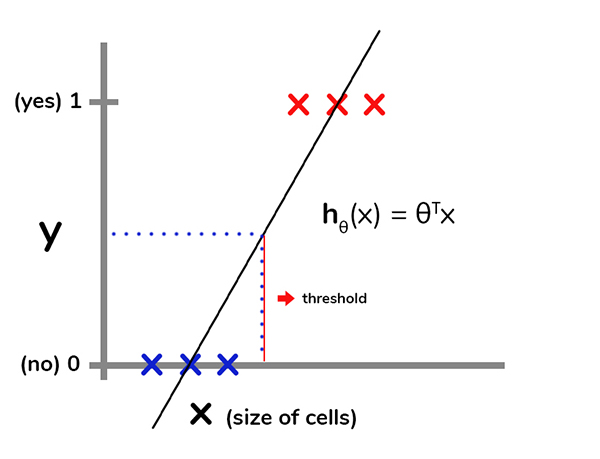

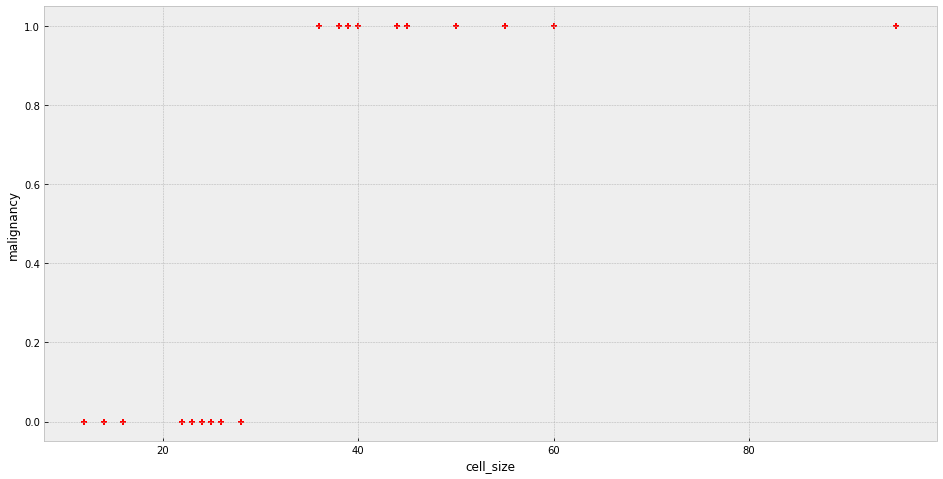

In [1]:
%matplotlib inline
import math
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (16,8)
warnings.filterwarnings('ignore')

da = pd.read_csv("dataset/cells.csv")
plt.xlabel('cell_size')
plt.ylabel('malignancy')
plt.scatter(da.cell_size, da.malignant, marker='+', color='red');
# ; at the end of plt.plot, plt.scatter used to prevent output from a code line

We can try to <code>**threshold classifier output hθ(x) at 0.5:**</code

\begin{multline*}
\text{if} \ h_{\theta}(x) \geq 0.5 \ \text{, predict "y=1"}
\end{multline*} 
\begin{multline*}
\text{if} \ h_{\theta}(x) < 0.5 \ \text{, predict "y=0"}
\end{multline*} 

And we are lucky because that fits our data quite well.In this particular example it looks that linear regression is doing something usefull. Even though its a classification task. But lets take a look where linear regression will most likely fail us.
    
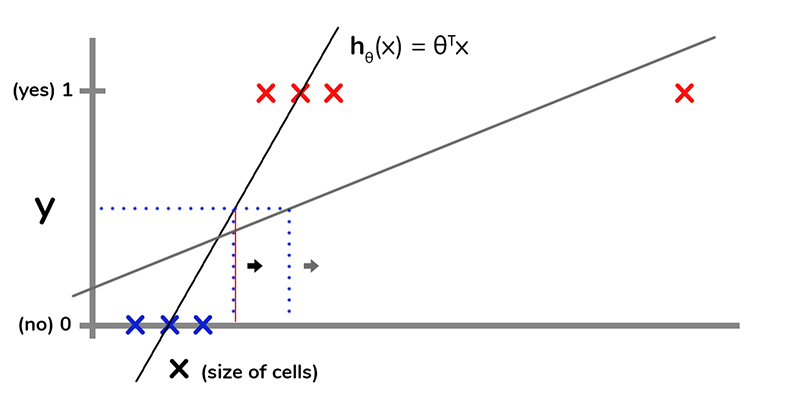

coefficients: [0.01957617], intercept: -0.18666905947627388


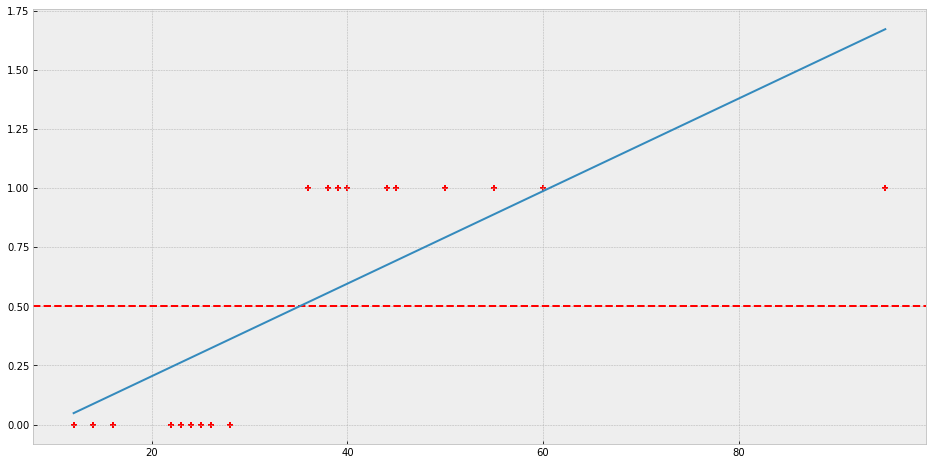

In [3]:
from sklearn import linear_model

x  = da.drop('malignant',1)
y  = da.malignant

re = linear_model.LinearRegression()
re.fit(x,y)
y_p = re.predict(x)

plt.scatter(da.cell_size, da.malignant, marker='+', color='red');
plt.axhline(y=0.5, color='red', linestyle='dashed')
plt.plot(x, y_p);
print(f'coefficients: {re.coef_}, intercept: {re.intercept_}')

After our threshold is shifted we get a <code>**false positive**</code> and our new data point that shifted linear regresion fit line does not give any new information. So applying linear regression to classification problem often is not productive soliution.

So what actually happens if you use linear regression for classification problem. For that type of problem we know that <code>**y is either 0 or 1**</code> but if linear regression is used then hypothesis can <code>**output value that is greater then 1 or less then 0**</code> even if all training examples has labels that are equal to 0 or 1.

<code>**Classification**</code>: y = 0 or 1 <br>

\begin{multline*}
h_{\theta}(x) \ \text{can be} \ > 1 \ \text{or} \ <0
\end{multline*} 

So we have to develop an algorithm that is formaly called logistic regression and has property that <code>**prediction outputs are always between 0 and 1**</code>

<code>**Logistic regression**</code>:<br>

\begin{multline*}
0 \leq h_{\theta}(x) \leq 1
\end{multline*} 

## Logistic regression

What function do we have to use for our classification problem. 

## Hypothesis representation

<code>**Logistic regression model:**</code>

\begin{multline*}
0 \leq h_{\theta}(x) \leq 1
\end{multline*}

<code>**Linear regression hypothesis:**</code>

\begin{multline*}
h_{\theta}(x) = \theta^{\top}x
\end{multline*}

<code>**[Sigmoid (logistic) function](https://en.wikipedia.org/wiki/Sigmoid_function#:~:text=4%20Applications-,Definition,refer%20to%20the%20same%20object.)**</code><br> <code>**NOTE: In statistics its called the logit function or the log-odds.**</code>

\begin{multline*}
h_{\theta}(x) = g(\theta^{\top}x)
\end{multline*}


\begin{multline*}
g(z) = \dfrac{1}{1+e^{-z}}
\end{multline*}

<code>**Logistic regression hypothesis:**</code>
\begin{multline*}
h_{\theta}(x) = \dfrac{1}{1+e^{-\theta^{\top}x}}
\end{multline*}

<code>**What is e , Euler's number ?**</code>, is a mathematical constant approximately equal to <code>**2.71828**</code>, and can be characterized in many ways. It is the base of the natural logarithm <code>**[you can found more about it here](https://www.youtube.com/watch?v=pDFcu_wLOzo) and [here](https://www.youtube.com/watch?v=m2MIpDrF7Es)** </code>

<code>**Properties of e (Euler's number):**</code>
<br>
\begin{multline*}
e = \lim\limits_{n \to \infty}( 1 + \dfrac{1}{n})^n
\end{multline*}

\begin{multline*}
e = \lim\limits_{n \to 0}( 1 + n)^{\dfrac{1}{n}}
\end{multline*}


\begin{multline*}
e = \sum_{n=0}^{\infty} \dfrac{1}{n!} = 1 + \dfrac{1}{1} + \dfrac{1}{1 \times 2} + \dfrac{1}{1 \times 2 \times 3} + ...
\end{multline*}

\begin{multline*}
y = e^x = \dfrac{dy}{dx}
\end{multline*}
<br>

<code>**Sigmoid (logistic) function**</code>

\begin{multline*}
g(\theta^{\top}x) = \dfrac{1}{1+e^{-\theta^{\top}x}}
\end{multline*}

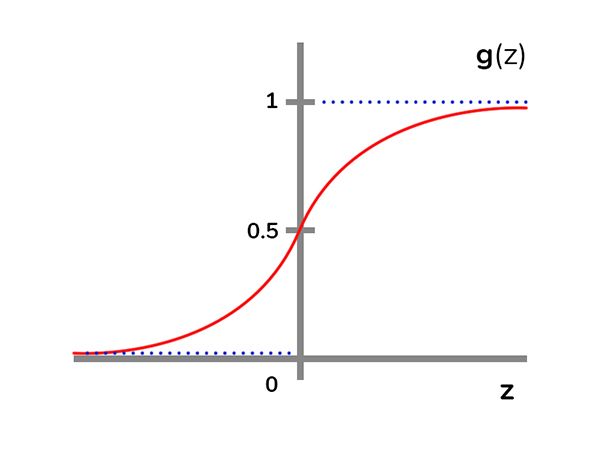

It is noticeable that <code>**sigmoid function**</code> asymptotes (red. lt. asimptotas - linija kuri nuolat artėja prie nurodytos kreivės, bet jos neatitinka jokiu baigtiniu atstumu) at 1 and asymptotes 0 on z minus to infinty.<br>

So now we have to do as before  <code>**fit our parameters θ to our data**</code>. And this hypothesis will let us make predictions.

## Hypothesis ouput

Interpret the output of logistic regression hypothesis output as a probabilty.

\begin{multline*}
h_{\theta}(x) = \ \text{estimated probabilty that y} \ = 1 \ \text{on input} \ x 
\end{multline*}

<br>

Lets say we have feature x vector that has x_0 that is always equal to 1 and x_1 that is test cell size.

\begin{multline*}
x = 
\begin{bmatrix}
x_{0} \\
x_{1 }
\end{bmatrix}
 =
\begin{bmatrix}
1 \\
cellsize
\end{bmatrix}
\end{multline*}

<br>
Our hypothesis outputs that:

\begin{multline*}
h_{\theta}(x) = 0.85
\end{multline*}

That tells us that this sample has 85% chance of tissue being malignant.<br>
<code>**Probability that y = 1, given x and parametrized by θ**</code>

\begin{multline*}
h_{\theta}(x) = P(y= 1\vert x ; \theta)
\end{multline*}

So we will count on our hypothesis to give us the <code>**estimates of the probabilty that y = 1**</code> and since this is a classification problem <br>we know that posible values of y = 0 or 1 

<div class="alert alert-block alert-success">

<h2>Practice exercise I</h2>
    
Suppose we want to predict, from data x about a tumor, whether it is malignant <code>**(y=1)**</code> or benign <code>**(y=0)**</code>.Logistic regression classifier outputs, for a specific tumor, <code>**hθ(x) = P(y=1|x;θ) = 0.55.**</code>
We estimate that there is a 55% chance of this tumor being malignant. <code>**What should be our estimate for P(y=0|x;θ), the probability the tumor is benign?**</code>
    
</div>

\begin{multline*}
P(y= 0 \vert x ; \theta) + P(y= 1 \vert x ; \theta) = 1
\end{multline*}

\begin{multline*}
P(y= 0 \vert x ; \theta) = 1 - P(y= 1 \vert x ; \theta)
\end{multline*}

coefficients: [0.01957617], intercept: -0.18666905947627388
probabilties: [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


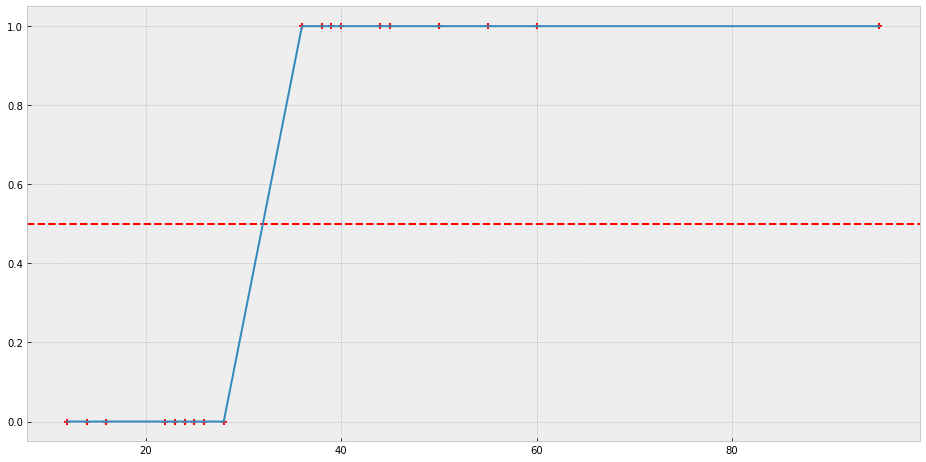

In [17]:
from sklearn.linear_model import LogisticRegression

x  = da.drop('malignant',1)
y  = da.malignant

lr = LogisticRegression()
lr.fit(x,y)
y_p = lr.predict(x)

plt.scatter(da.cell_size, da.malignant, marker='+', color='red');
plt.axhline(y=0.5, color='red', linestyle='dashed')
plt.plot(x, y_p);
print(f'coefficients: {re.coef_}, intercept: {re.intercept_}')
print(f'probabilties: {y_p}')

## Decision Boundary

What logistic regression hypothesis function is computing and when this hypothesis will make predictions that y is equal to 1 versus when it might make predictions that y is equal to 0.

<code>**Suppose we predict:**</code>

\begin{multline*}
 y = 1 | \ \text{if} \ h_{\theta}(x) \geq 0.5
\end{multline*}

\begin{multline*}
 y = 0 | \ \text{if} \ h_{\theta}(x) < 0.5
\end{multline*}

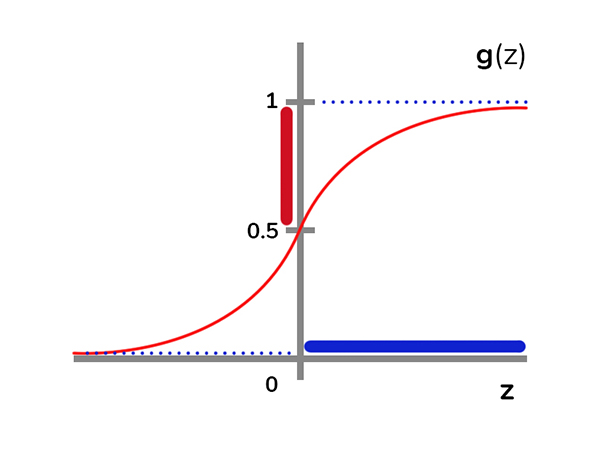
$$g(z) \geq 0.5 \ \text{,when} \ z \geq 0$$

<code>**There for**</code>

\begin{multline*}
h_{\theta}(x) =  g(\theta^{\top}x) \geq 0.5 \ \text{,when} \ \theta^{\top}x \geq 0
\end{multline*}

<code>**Outcome**</code>

\begin{multline*}
 y = 1 | \ \text{if} \ \theta^{\top}x \geq 0
\end{multline*}

\begin{multline*}
 y = 0 | \ \text{if} \ \theta^{\top}x < 0
\end{multline*}

Lets use this to better see how the hypothesis of logistic regression makes those predictions. <code>**Without fitting parameters.**</code><br>

<code>**Hypothesis**</code> 

\begin{multline*}
h_{\theta}(x) = g(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2})
\end{multline*}

<code>**Our random choice of parameters**</code> 

\begin{multline*}
\theta = 
\begin{bmatrix}
-5 \\
1 \\ 
1
\end{bmatrix}
\end{multline*}

Given this choice of our parametes lets try to figure out where hypothesis would end up predicting y = 1 and y = 0.<br>
By using our intuition from previous section where we worked out formulas
<code>**Predict**</code> 

\begin{multline*}
y = 1 \ \text{if} \  \theta^{\top}x \geq 0
\end{multline*}

\begin{multline*}
y = 1 \ \text{if} -5 + x_{1} + x_{2} \geq 0
\end{multline*}

\begin{multline*}
x_{1} + x_{2} \geq 5
\end{multline*}

<code>**This correspond to**</code>

\begin{multline*}
x_{1} + x_{2} = 5
\end{multline*}

In [254]:
# coef = np.array([[-5 , 1, 1]])
# xese = np.array([[1, 1, 1]]).T

0.04742587317756678

<code>**This equation defines a straight line**</code> and that line we are going to called <code>**decision boundary**</code>

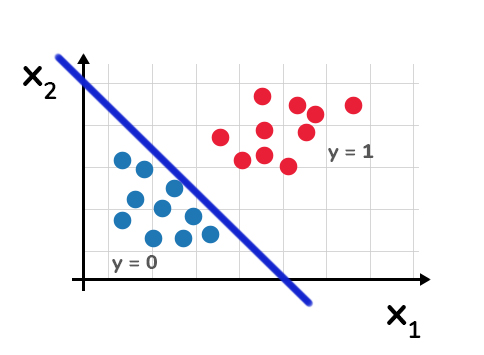

It passes through 5 on the x1 and x2 axis. The part of the inputspace , the part of the x1, x2 plane that corresponds to when x1 + x2 is greater than or equal to 5 thats going to this <code>**right halfspace that is everything to the upper right portion of this line is the y=1 region.**</code> 

<code>**This straight line:**</code> 
\begin{multline*}
x_{1} + x_{2} = 5
\end{multline*}

<code>**Coresponds to set of points or region where hypothesis is exactly equal to 0.5:**</code> 

\begin{multline*}
h_{\theta}(x) = 0.5
\end{multline*}

Decision boundary is a porperty of the hypothesis including the parameters 𝜃_0, 𝜃_1, 𝜃_2.
We drew a data set in order to help visualize but even if we take away the data set this decision boundary and the region where we predict y = 1 versus y = 0 , <code>**that's a property of the hypothesis and the parameters of the hypothesis and not a property of the data set!. Parameters 𝜃_n completly defines the decision boundary**</code>

<div class="alert alert-block alert-success">

<h2>Practice exercise II</h2>
    
Suppose we have logistic regression with two features x_1 and x_2. 
Our theta parameters are <code>**𝜃_0 = 5, 𝜃_1 = -1, 𝜃_2 = 0**</code>. That  <code>**h𝜃(x) = g(5 - x_1) y**</code><br>
<code>**Draw the decision boundary of h𝜃(x) and mark which halfspace predict y=1, y=0**</code>
</div>

## Non-linear decision boundaries

If training data set is like this, how can I get logistic regression to fit this. Well earlier when we were talking about <code>**polynomial regression**</code> we talked about how we could add extra higher order polynomial terms to the features. We can do the same for logistic regression.

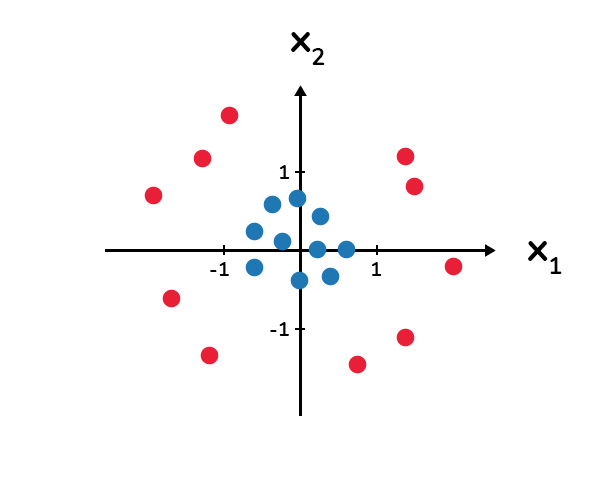

<code>**Hypothesis**</code> 

\begin{multline*}
h_{\theta}(x) = g(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{1}^2 + \theta_{4}x_{2}^2)
\end{multline*}

Lets disregard for now automatical choice for parameters values and choose by ourselfves some arbitrary values.

\begin{multline*}
\theta = 
\begin{bmatrix}
-1 \\
0 \\
0 \\
1 \\
1
\end{bmatrix}
\end{multline*}

<code>**Predict**</code> 

\begin{multline*}
y = 1 \ \text{if} \ -1 + x_{1}^{2} + x_{2}^{2} \geq 0
\end{multline*}


\begin{multline*}
y = 1 \ \text{if} \ x_{1}^{2} + x_{2}^{2} \geq 1
\end{multline*}

\begin{multline*}
x_{1}^{2} + x_{2}^{2} = 1
\end{multline*}


And we would try to plot this equation it would look like a <code>**circle with R = 1**</code>

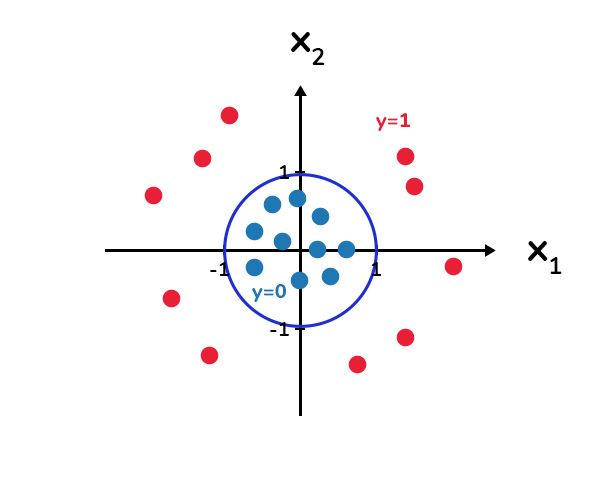

By adding these more complex polynomial terms to our features we get more complex decision boundaries that don't just try to separate the positive and negative examples in a straight line. Like in the above example we can have a decision boundary that is a circle. <code>**To recap that decision boundary is not a property of training set but of the hypothesis and the parameters. As we are given our parameters vector theta and that defines the decision boundary that is the circle and the training set is used to fit the parameteres theta**</code>

What about even higher polynomial terms

\begin{multline*}
h_{\theta}(x) = g(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{1}^2 + \theta_{4}x_{1}^2x_{2} + \theta_{5}x_{1}^2x_{2}^{2} + \theta_{6}x_{1}^3x_{2} + ...)
\end{multline*}


Funny and complex shapes starts to be our decision boundary

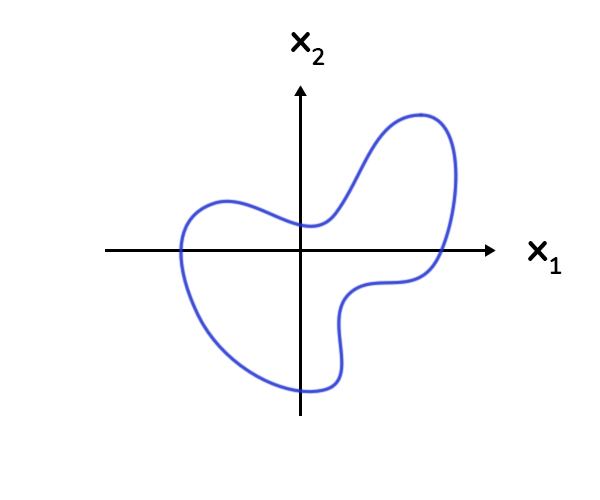

<code>**Properties of Logistic Regression:**</code>
  * The dependent variable in logistic regression follows <code>**[Bernoulli Distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution#:~:text=The%20Bernoulli%20distribution%20is%20a,not%20be%200%20and%201.)**</code>.
  * Estimation is done through <code>**[Maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)**</code>.
  * No R Square, Model fitness is calculated through <code>**Concordance, KS-Statistics**</code>.

# Practice



In [ ]:
#TODO